In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import torch
import matplotlib
#from sklearn import preprocessing

import preprocessing
import train

In [2]:
%load_ext autoreload
%autoreload 2

#### more data

In [3]:
S_data_2019_04_25 = preprocessing.Preprocessing('S_data_2019_04_25','/Users/cm/20190425/','home-assistant_v2.db')

In [4]:
rooms = ['sleeping','kitchen','living','bath']#['schlafzimmer','kuche','wohnzimmer','bad']

In [21]:
S_data_2019_04_25.load_data(domain='sensor',item='wt',rooms=rooms)

#### Extract weather data

In [22]:
S_data_2019_04_25.extract_weather_data()

#### Build X Frames weather data

In [23]:
S_data_2019_04_25.build_x_frame(domain='sensor', rooms=rooms)

#### Test with one specific DataFrame

In [24]:
wohnzimmer = S_data_2019_04_25.get('train_climatewohnzimmer')
kueche = S_data_2019_04_25.get('train_climatekuche')
schlafzimmer = S_data_2019_04_25.get('train_climateschlafzimmer')

KeyError: 'train_climatewohnzimmer'

In [25]:
wohnzimmer = S_data_2019_04_25.get('train_sensorliving')
kueche = S_data_2019_04_25.get('train_sensorkitchen')
schlafzimmer = S_data_2019_04_25.get('train_sensorsleeping')

In [26]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

In [27]:
end_date = np.datetime64('2019-04-07 23:59:00')
start_date = np.datetime64('2018-04-03 00:00:00')

In [28]:
frame3 = wohnzimmer_sel = wohnzimmer[(wohnzimmer['last_updated'] > start_date) & (wohnzimmer['last_updated'] < end_date)]
frame4 = min_max_scaler.fit_transform(wohnzimmer_sel.drop(columns=['last_updated','day','month', 'year','symbol']).astype(np.float64)).astype(np.float32)#,'current_temp','day','month', 'year','symbol']).astype(np.float64)).astype(np.float32)

In [29]:
wohnzimmer_sel.columns

Index(['last_updated', 'current_temp', 'set_temp', 'weather_temperature',
       'symbol', 'precipitation', 'wind_speed', 'pressure', 'wind_direction',
       'humidity', 'fog', 'cloudiness', 'low_clouds', 'medium_clouds',
       'high_clouds', 'dewpoint_temperature', 'day', 'month', 'year'],
      dtype='object')

In [30]:
wohnzimmer_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1896 entries, 1 to 1896
Data columns (total 19 columns):
last_updated            1896 non-null datetime64[ns]
current_temp            1896 non-null float64
set_temp                1896 non-null float64
weather_temperature     1896 non-null float64
symbol                  1896 non-null float64
precipitation           1896 non-null float64
wind_speed              1896 non-null float64
pressure                1896 non-null float64
wind_direction          1896 non-null float64
humidity                1896 non-null float64
fog                     1896 non-null float64
cloudiness              1896 non-null float64
low_clouds              1896 non-null float64
medium_clouds           1896 non-null float64
high_clouds             1896 non-null float64
dewpoint_temperature    1896 non-null float64
day                     1896 non-null int64
month                   1896 non-null int64
year                    1896 non-null int64
dtypes: datetime64

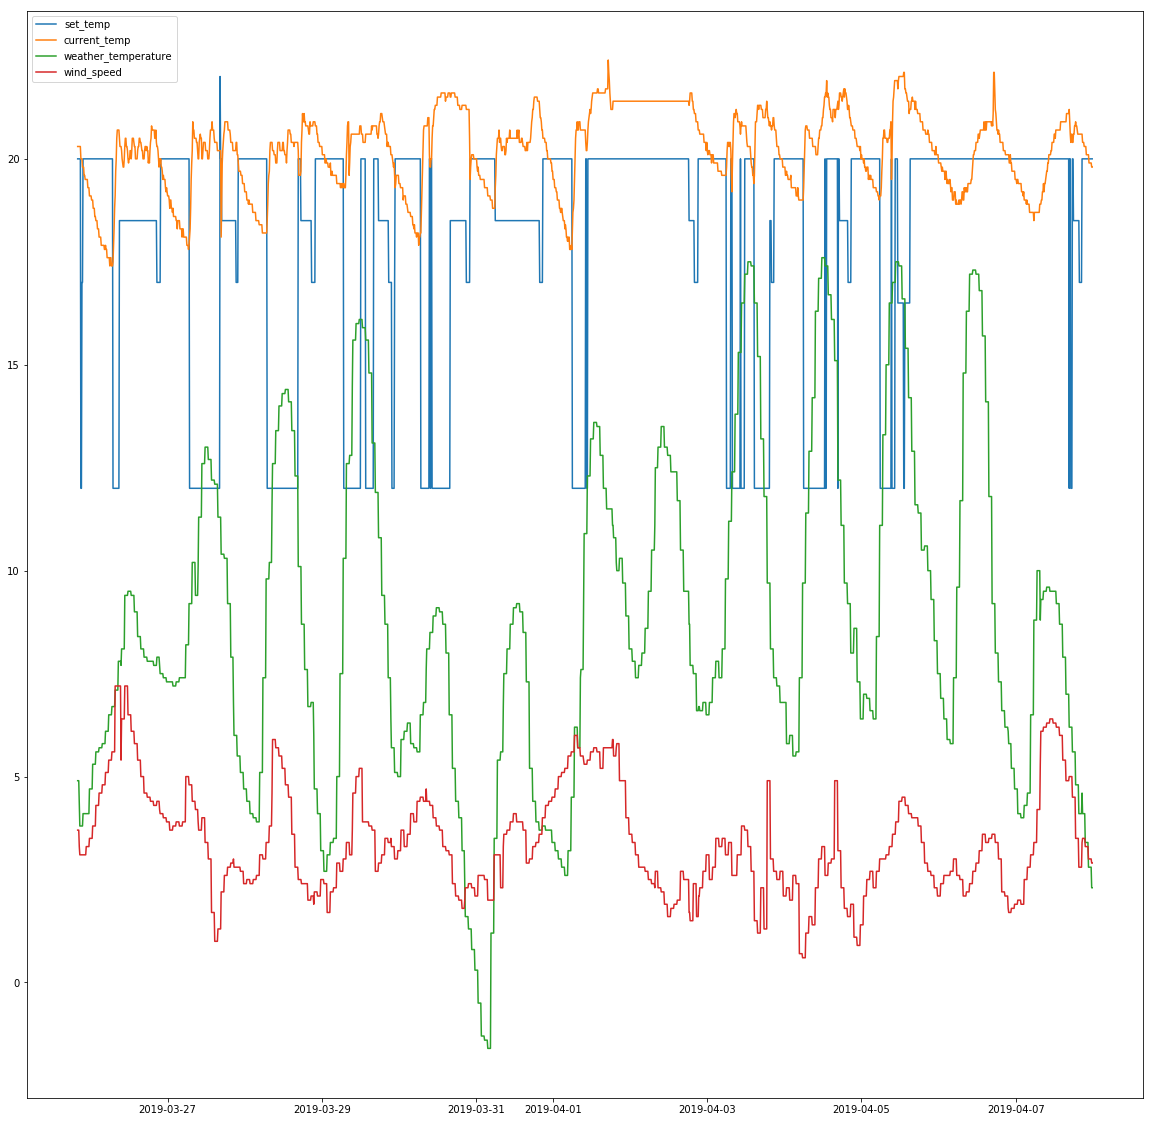

In [31]:
dates = matplotlib.dates.date2num(wohnzimmer_sel['last_updated'])
fig1 = plt.figure(1,figsize=[20,20])
plt.plot_date(dates, wohnzimmer_sel['set_temp'], '-')
plt.plot_date(dates, wohnzimmer_sel['current_temp'], '-');
plt.plot_date(dates, wohnzimmer_sel['weather_temperature'], '-')
plt.plot_date(dates, wohnzimmer_sel['wind_speed'], '-')
plt.legend();

In [32]:
frame3 = kueche_sel = kueche[(kueche['last_updated'] > start_date) & (kueche['last_updated'] < end_date)]
frame4 = min_max_scaler.fit_transform(kueche_sel.drop(columns=['last_updated','current_temp','day','month', 'year','symbol']).astype(np.float64)).astype(np.float32)

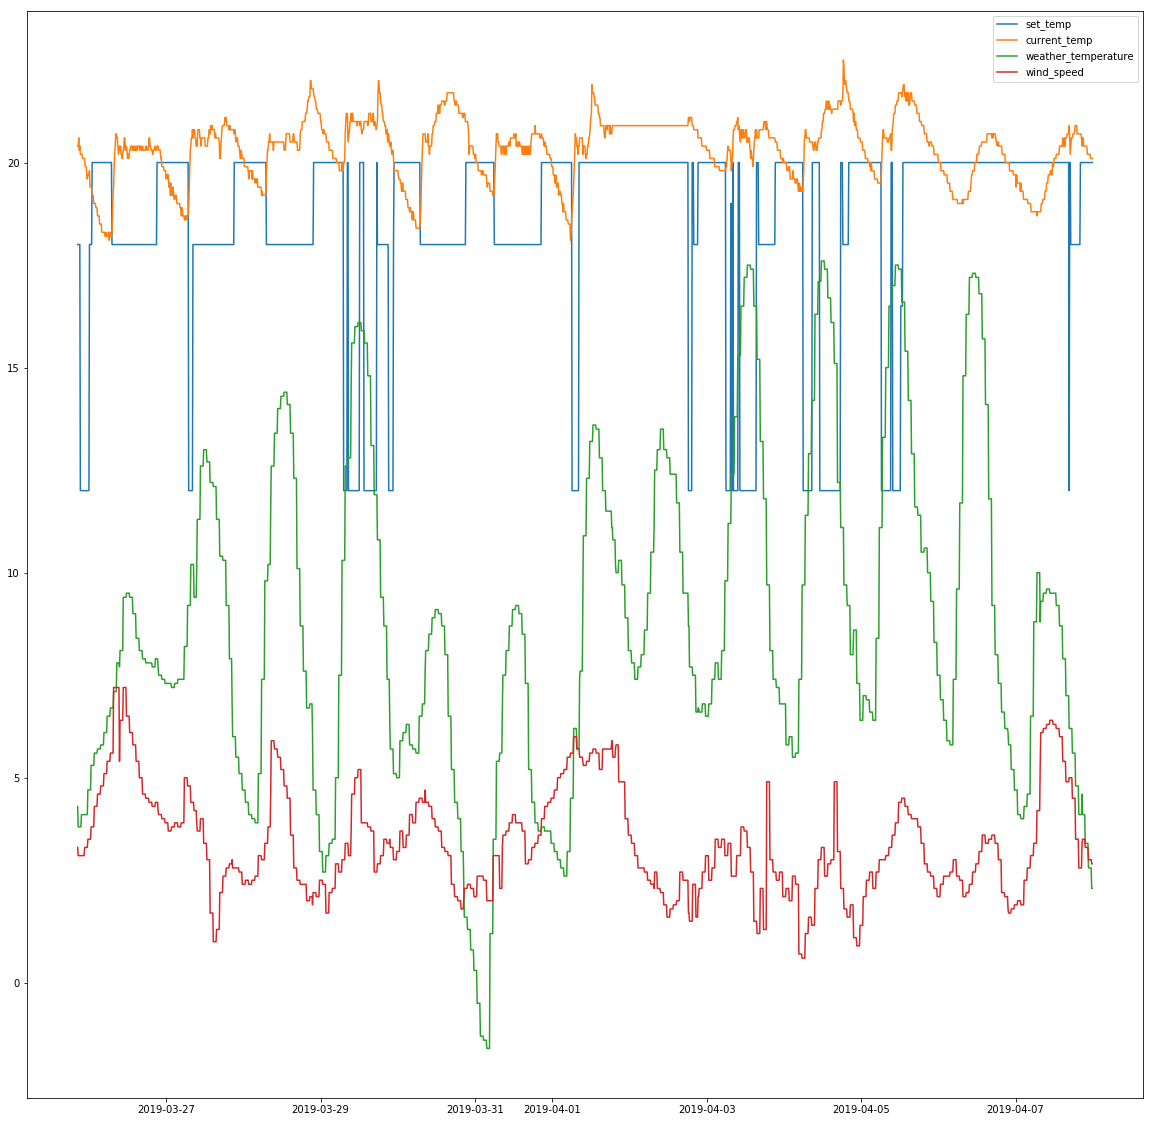

In [33]:
dates = matplotlib.dates.date2num(kueche_sel['last_updated']);
fig1 = matplotlib.pyplot.figure(figsize=[20,20]);
plt.plot_date(dates, kueche_sel['set_temp'], '-');
plt.plot_date(dates, kueche_sel['current_temp'], '-');
plt.plot_date(dates, kueche_sel['weather_temperature'], '-');
matplotlib.pyplot.plot_date(dates, kueche_sel['wind_speed'], '-');
plt.legend();

In [34]:
frame3 = schlafzimmer_sel = schlafzimmer[(schlafzimmer['last_updated'] > start_date) & (schlafzimmer['last_updated'] < end_date)]
frame4 = min_max_scaler.fit_transform(schlafzimmer_sel.drop(columns=['last_updated','current_temp','day','month', 'year','symbol']).astype(np.float64)).astype(np.float32)

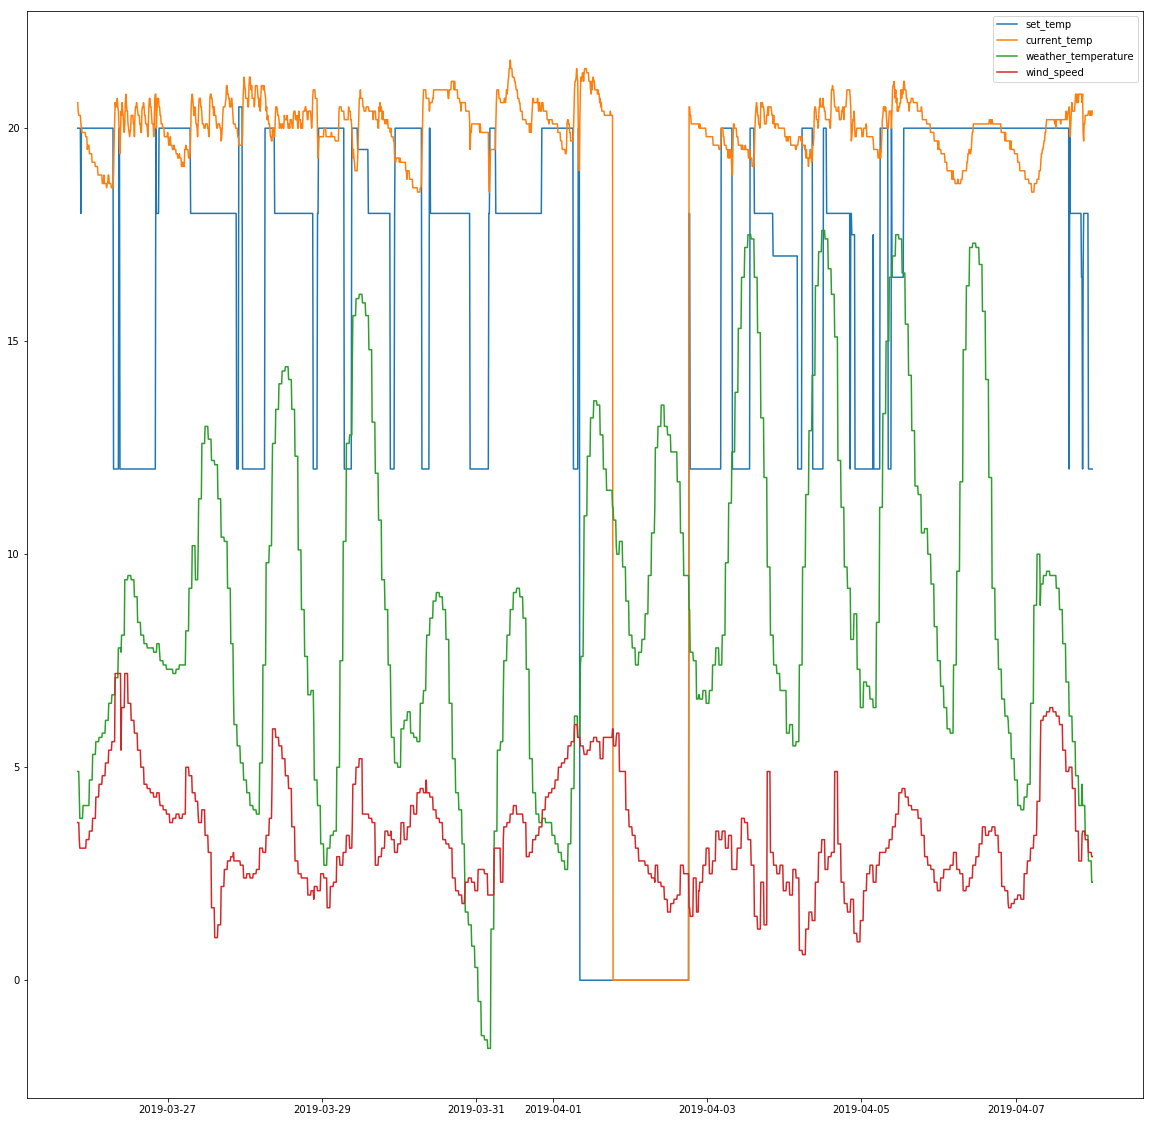

In [35]:
dates = matplotlib.dates.date2num(schlafzimmer_sel['last_updated']);
fig1 = matplotlib.pyplot.figure(figsize=[20,20]);
plt.plot_date(dates, schlafzimmer_sel['set_temp'], '-');
plt.plot_date(dates, schlafzimmer_sel['current_temp'], '-');
plt.plot_date(dates, schlafzimmer_sel['weather_temperature'], '-');
matplotlib.pyplot.plot_date(dates, schlafzimmer_sel['wind_speed'], '-');
plt.legend();

In [36]:
wohnzimmer_sel.columns#.drop(columns=['last_updated', 'day','month', 'year'])

Index(['last_updated', 'current_temp', 'set_temp', 'weather_temperature',
       'symbol', 'precipitation', 'wind_speed', 'pressure', 'wind_direction',
       'humidity', 'fog', 'cloudiness', 'low_clouds', 'medium_clouds',
       'high_clouds', 'dewpoint_temperature', 'day', 'month', 'year'],
      dtype='object')

In [37]:
train_set, val_set, test_set = train.train_val_test_split(wohnzimmer_sel, 143,0.2, 0.1)

train:  ['2019-04-02', '2019-04-03', '2019-04-04'] val : ['2019-04-05'] test:  ['2019-04-06']
(429, 19) (143, 19) (143, 19)
429 143 143


ValueError: too many values to unpack (expected 3)

In [ ]:
trainset_df = pd.DataFrame(train_set.reshape(train_set.shape[0]*train_set.shape[1],train_set.shape[2]))#.sample(frac=1439).reset_index(drop=True)
valset_df = pd.DataFrame(val_set.reshape(val_set.shape[0]*val_set.shape[1],val_set.shape[2]))#.sample(frac=1439).reset_index(drop=True)
testset_df = pd.DataFrame(test_set.reshape(test_set.shape[0]*test_set.shape[1],test_set.shape[2]))

In [ ]:
X_train = trainset_df.drop(columns=[0])
y_train = trainset_df[0]
X_val = valset_df.drop(columns=[0])
y_val = valset_df[0]
X_test = testset_df.drop(columns=[0])
y_test = testset_df[0]

In [ ]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()

In [ ]:
min_max_scaler.fit(X_train.astype(np.float64))

In [ ]:
X_train = min_max_scaler.transform(X_train).astype(np.float32)
X_val= min_max_scaler.transform(X_val).astype(np.float32)

In [ ]:
X_train.shape

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
X_train.shape

In [ ]:
train_errors = []
test_errors = []
train_errors_val = []

for k in range(1,10):
    knn_iterated = KNeighborsRegressor(k)
    # Training
    knn_iterated.fit(X_train, y_train)
    
    # Predict
    y_k_predict = knn_iterated.predict(X_train)
    train_errors.append((1.0 * (y_train - y_k_predict)).mean())
                        
    y_k_predict_val = knn_iterated.predict(X_val)
    train_errors_val.append((1.0 * (y_val - y_k_predict_val)).mean())

In [ ]:
matplotlib.pyplot.plot(train_errors)
matplotlib.pyplot.plot(train_errors_val);

In [ ]:
knn = sklearn.neighbors.KNeighborsRegressor(2)
knn.fit(X_train, y_train)
y_k_predict = knn.predict(X_train)

In [ ]:
matplotlib.pyplot.plot(list(y_train));
matplotlib.pyplot.plot(y_k_predict.reshape(y_k_predict.shape[0]));

In [ ]:
D_in = X_train.shape[1]
D_out = 1
N = X_train.shape[0]

In [ ]:
# Zufällige initialisierung der Gewichte
w = np.random.randn(D_in, D_out)

In [ ]:
learning_rate = 1e-3

In [ ]:
loss_hist = []
loss_hist_val = []
# Train
for t in range(300):
    # Berechne die Vorhersage
    y_pred = X_train.dot(w)
    y_pred_val = X_val.dot(w)
    y_pred = y_pred.reshape(y_pred.shape[0])
    y_pred_val = y_pred_val.reshape(y_pred_val.shape[0])
    # Berechne den Fehler (Ausgabe des Fehlers alle 100 Iterationen)
    loss = np.square(y_pred - y_train).sum()
    loss_val = np.square(y_pred_val - y_val).sum()
    if t % 2 == 0:
        loss_hist.append(loss)
        loss_hist_val.append(loss_val)
        print(t, loss)

    # Berechne die Gradienten von w1 im Bezug auf den Fehler 
    grad_y_pred = 2.0 * (y_pred - y_train)
    grad_w = (1/N) * X_train.T.dot(grad_y_pred)

    # Aktualisiere die Gewichte mittels Gradienten Abstieg
    w -= learning_rate * grad_w.sum()

In [ ]:
matplotlib.pyplot.plot(loss_hist)
matplotlib.pyplot.plot(loss_hist_val);

In [ ]:
len(list(y_pred.reshape(y_pred.shape[0])))

In [ ]:
sklearn.metrics.mean_squared_error(list(y_train), list(y_pred.reshape(y_pred.shape[0])))

In [ ]:
len(list(y_train))

In [ ]:
matplotlib.pyplot.plot(list(y_train))
matplotlib.pyplot.plot(list(y_pred));
matplotlib.pyplot.legend(['real','predicted'])

In [ ]:
#error = 
error = list(np.array(list(y_train)) - np.array(list(y_pred.reshape(y_pred.shape[0]))))

In [ ]:
matplotlib.pyplot.plot(error);

In [ ]:
y_train.shape

In [ ]:
X_train.shape

In [ ]:
frame4.shape

In [ ]:
knn = sklearn.neighbors.KNeighborsRegressor(2)
knn.fit(X_train, y_train)
y_k_predict = knn.predict(frame4)
len(y_k_predict)

In [ ]:
len(frame4[:,1])

In [ ]:
(y_k_predict-frame3['current_temp']).mean()

In [ ]:
dates = matplotlib.dates.date2num(frame3['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,10])
matplotlib.pyplot.plot_date(dates,list(frame3['current_temp']),'-')
matplotlib.pyplot.plot_date(dates,y_k_predict.reshape(y_k_predict.shape[0]),'-')
matplotlib.pyplot.legend(['gemessen','vorhergesagt']);

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Train the model using the training sets
error = []
error_val = []
error_test = []
probilities = pd.DataFrame()
proba_test = []
proba_train = []
proba_validate = []

for i in range(1, 150):
#Predict Output
    classifier = DecisionTreeRegressor(max_depth = i)
    classifier.fit(X_train,y_train)
    y_= classifier.predict(X_train)
    y_v = classifier.predict(X_val)
    y_t = classifier.predict(X_test)
    error.append(sklearn.metrics.mean_squared_error(y_train,y_))
    error_test.append(sklearn.metrics.mean_squared_error(y_test,y_t))
    error_val.append(sklearn.metrics.mean_squared_error(y_val,y_v))

In [ ]:
matplotlib.pyplot.plot(error)
matplotlib.pyplot.plot(error_val)
#matplotlib.pyplot.plot(error_test)
matplotlib.pyplot.legend(['train','val','test']);

In [ ]:
y_t_1 = classifier.predict(X_test)

In [ ]:
dtr = DecisionTreeRegressor(max_depth=95)
dtr.fit(X_train, y_train)
y_dtr_predict = dtr.predict(frame4)

In [ ]:
(y_dtr_predict-frame3['current_temp']).mean()

In [ ]:
dates = matplotlib.dates.date2num(frame3['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,10])
matplotlib.pyplot.plot_date(dates,list(frame3['current_temp']),'-')
matplotlib.pyplot.plot_date(dates,y_dtr_predict,'-')
matplotlib.pyplot.legend(['gemessen','vorhergesagt']);

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
error_train = []
error_val = []

for i in range(1, 100):
    #for j in range(1,5):
        #for k in range(2,10):
    d_forest = RandomForestRegressor(n_estimators=i, n_jobs=-1, random_state=42)
    d_forest.fit(X_train, y_train)
    y_pred_train = d_forest.predict(X_train)
    y_pred_val = d_forest.predict(X_val)
    error_train.append(sklearn.metrics.mean_squared_error(y_train, y_pred_train))
    error_val.append(sklearn.metrics.mean_squared_error(y_val, y_pred_val))

In [ ]:
matplotlib.pyplot.plot(error_train)
matplotlib.pyplot.plot(error_val)
matplotlib.pyplot.legend(['train','val']);

In [ ]:
fr = RandomForestRegressor(n_estimators=2, n_jobs=-1)
fr.fit(X_train, y_train)
y_fr_predict = fr.predict(frame4)

In [ ]:
dates = matplotlib.dates.date2num(frame3['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,10])
matplotlib.pyplot.plot_date(dates,list(frame3['current_temp']),'-')
matplotlib.pyplot.plot_date(dates,y_fr_predict,'-')
matplotlib.pyplot.legend(['gemessen','vorhergesagt']);

In [ ]:
(y_fr_predict-frame3['current_temp']).mean()

In [ ]:
dates = matplotlib.dates.date2num(frame3['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,10])
matplotlib.pyplot.plot_date(dates,list(frame3['current_temp']),'-')
matplotlib.pyplot.plot_date(dates, frame3['set_temp'], 'b-')
matplotlib.pyplot.plot_date(dates,y_k_predict.reshape(y_k_predict.shape[0]),'-')
matplotlib.pyplot.plot_date(dates,y_dtr_predict,'-')
matplotlib.pyplot.plot_date(dates,y_fr_predict,'-')
matplotlib.pyplot.legend(['gemessen', 'Solltemperatur', 'vorhergesagt KNN', 'vorhergesagt DTree', 'Random Forest']);